**Nama : Mohamad Adhikasurya Haidar
<br>NIM  :    19/445704/PA/19528**

1. Diberikan persamaan <br>

    $x^3 + ln(\frac{x^2 + x - 4}{x^2 - x + 5}) + 2$ <br>

    Carilah nilai 𝑥 yang memenuhi dengan menggunakan metode Bisection dan eror sebesar
    $10^{-6}$!

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import pandas as pd
import numpy as np

def f(x) :
    return x**3 + np.log((x**2 + x - 4)/(x**2 - x + 5)) + 2


def my_bisec(a,b,error):
    c = (a + b)/2
    A=np.array([[a, b , c,f(a),f(b),f(c), b - c, error]])
    jumlah_iterasi_maksimal = np.ceil((np.log(abs(b-a))-np.log(error))/np.log(2))
    i = 0
    while i < jumlah_iterasi_maksimal :
        A= np.append(A,[[a, b , c,f(a),f(b),f(c), b - c, error]],axis=0)
        if (b - c) <= error :
            print("akar :", c)
            return A
        if np.isnan(f(c)) :
            print("terdapat nilai f(c) tidak terdefinisi, sehingga iterasi dihentikan.")
            return A
        if f(a)*f(c)<0:
            b=c
            c=(a+b)/2
        elif f(c)*f(b)<0:
            a=c
            c=(a+b)/2
        i = i + 1
    else :
        print("Metode biseksi gagal")
        return (A)

table = my_bisec(1.562,2,1e-06)
df = pd.DataFrame(table,columns=['a', 'b' , 'c','f(a)','f(b)','f(c)', 'b - c', 'error'])
df = df.iloc[1:]
df['b-c <= error'] = df['b - c'] < df['error']
df

akar : 1.5657084236145022


,a,b,c,f(a),f(b),f(c),b - c,error,b-c <= error
1,1.562000,2.000000,1.781000,-2.255972,8.747237,5.746197,2.190000e-01,0.000001,False
2,1.562000,1.781000,1.671500,-2.255972,5.746197,4.093236,1.095000e-01,0.000001,False
3,1.562000,1.671500,1.616750,-2.255972,4.093236,2.967772,5.475000e-02,0.000001,False
4,1.562000,1.616750,1.589375,-2.255972,2.967772,2.075191,2.737500e-02,0.000001,False
5,1.562000,1.589375,1.575687,-2.255972,2.075191,1.296853,1.368750e-02,0.000001,False
6,1.562000,1.575687,1.568844,-2.255972,1.296853,0.584931,6.843750e-03,0.000001,False
7,1.562000,1.568844,1.565422,-2.255972,0.584931,-0.073489,3.421875e-03,0.000001,False
8,1.565422,1.568844,1.567133,-0.073489,0.584931,0.305075,1.710937e-03,0.000001,False
9,1.565422,1.567133,1.566277,-0.073489,0.305075,0.132458,8.554687e-04,0.000001,False
10,1.565422,1.566277,1.565850,-0.073489,0.132458,0.034463,4.277344e-04,0.000001,False


**Interpretasi** :<br>
Dari kode di atas, diperoleh nilai akar dari fungsi $f(x) =$ $x^3 + ln(\frac{x^2 + x - 4}{x^2 - x + 5}) + 2$  adalah $1.5657084236145022$ pada iterasi ke 19 <br>
dengan toleransi galat $10^{-6}$. Untuk grafik dari fungsi $f(x)$ sendiri saya cantumkan di cell berikut.

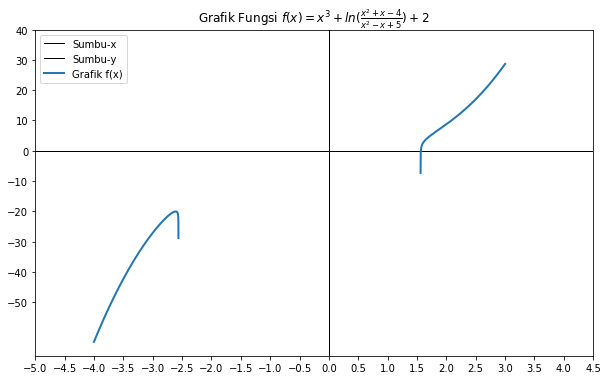

In [12]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-4,3,100000)
y = np.array([(n**3 + np.log((n**2 + n - 4)/(n**2 - n + 5)) + 2) for n in x])
fig, axes = plt.subplots(figsize=(10,6))
axes.axhline(linewidth=1, color='black', label = 'Sumbu-x')
axes.axvline(linewidth=1, color='black', label = 'Sumbu-y')
axes.set_title("Grafik Fungsi ${}$".format('f(x) = x^3 + ln(\\frac{x^2 + x - 4}{x^2 - x + 5}) + 2'))
axes.plot(x, y, lw = 2, label = 'Grafik f(x)')
axes.set_xticks(np.arange(-5, 5, step=0.5))
axes.set_yticks(np.arange(-50, 50, step=10))
plt.legend()
plt.show()

Terlihat dari grafik bahwa akar dari  $f(x) =$ $x^3 + ln(\frac{x^2 + x - 4}{x^2 - x + 5}) + 2$ berada di antara $x = 1.5$ dan $x = 2$.<br>
jelas nilai dari $f(2) > 0$, saya ambil batas atasnya(b) di $x = 2$.<br>
Untuk interval bawahnya sendiri(a) kita harus cari a di mana $f(a) < 0$. Karena f(1.5) tidak terdefinisi, kita harus mencari nilai batas bawahnya di interval $[1.5 , 2]$. <br>
Saya kontruksi code untuk mencari nilai batas bawahnya sebagai berikut.

In [13]:
import numpy as np
def f(x) :
    return x**3 + np.log((x**2 + x - 4)/(x**2 - x + 5)) + 2
x_es = np.linspace(1.5,2,1000)
for x in x_es :
    if f(round(x,3)) < 0 :
        print('Diperoleh nilai batas bawah(a) :',round(x,3))
        break

Diperoleh nilai batas bawah(a) : 1.562


Sehingga diambil untuk interval metode biseksi di atas adalah 
$[1.562,2]$<br> 

2. Carilah akar dari fungsi 
$𝑓(𝑥) = 𝑥 + 𝑒^{−𝑥^{2}}$
menggunakan metode Newton-Rhapson dan
Secant dengan iterasi maksimal 5.

In [14]:
# Newton Methods
import numpy as np
import pandas as pd


def F(x) :
    return x + np.exp(-x**2)
def f(x) :
    return  1 - 2*x*np.exp(-x**2)
def newton(x0, error, i_max):
    x = x0
    A=np.array([[x0, None , F(x0),f(x0),abs(x-x0), error]])
    i = 0
    while i < i_max :
        x0 = x
        x  = x0 - F(x)/f(x)
        A  = np.append(A,[[x0, x , F(x0),f(x0),abs(x-x0), error]],axis=0)
        if abs(x-x0) < error :
            return x,A
        i+=1
akar, table = newton(-1,1e-6, 5)
table = pd.DataFrame(table, columns=['x0','x','f(x0)',"f'(x0)","|x-x0|", "error"])
table['|x-x0| < error'] = table['|x-x0|'] < table['error']
table = table.iloc[1:]
print(akar)
table

-0.6529186404192047


,x0,x,f(x0),f'(x0),|x-x0|,error,|x-x0| < error
1,-1,-0.635825,-0.632121,1.73576,0.364175,1e-06,False
2,-0.635825,-0.652937,0.0316372,1.84878,0.0171125,1e-06,False
3,-0.652937,-0.652919,-3.43259e-05,1.85261,1.85284e-05,1e-06,False
4,-0.652919,-0.652919,-3.30304e-11,1.85261,1.78292e-11,1e-06,True


Interpretasi :<br>
Diselidiki dari grafik, nilai x yang dimana nilai dari $f(x)$ cukup dekat dengan nol,<br> 
saya ambil $x = -1$ , di mana $f(-1) = -0.632121$ <br>
Dari kode di atas, diperoleh nilai akar dari fungsi $𝑓(𝑥) = 𝑥 + 𝑒^{−𝑥^{2}}$ adalah $1.5657084236145022$ pada iterasi ke 4 <br>
dengan toleransi galat $10^{-6}$. Untuk grafik dari fungsi $𝑓(𝑥) = 𝑥 + 𝑒^{−𝑥^{2}}$ sendiri saya cantumkan di cell berikut.

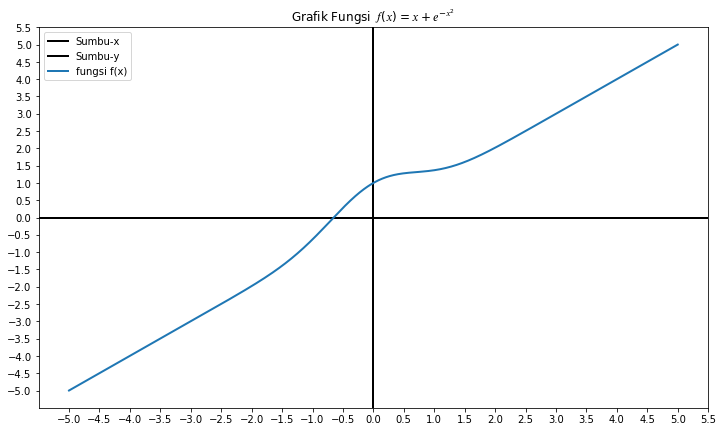

In [15]:
x = np.linspace(-5,5,1000)
y = [(n + np.exp(-n**2)) for n in x]
fig, axes = plt.subplots(figsize=(12,7))
axes.axhline(linewidth=2, color='black', label = 'Sumbu-x')
axes.axvline(linewidth=2, color='black', label = 'Sumbu-y')
axes.plot(x, y, lw = 2, label = 'fungsi f(x)')
axes.set_title("Grafik Fungsi ${}$".format('𝑓(𝑥) = 𝑥 + 𝑒^{−𝑥^{2}}'))
axes.set_xticks(np.arange(-5, 6, step=0.5))
axes.set_yticks(np.arange(-5, 6, step=0.5))
plt.legend()
plt.show()